In [89]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
# Read the dataset

nutrient = pd.read_csv("nutrientcomposition_new.csv")

In [54]:
nutrient.head()

,S.No,Protein,Fat,vitaminC,Fibre,Product
0,725,0.000128,0.131787,0.399502,0.616891,Snacks
1,816,0.000832,0.400516,1.420966,1.054027,"Mountain yam, hawaii, cooked, steamed, without..."
2,804,0.001940,0.096019,0.440585,0.041487,Snacks
3,776,0.002033,0.046392,0.988005,1.662208,"Milk, chocolate, fluid, commercial, reduced fa..."
4,242,0.002175,0.561462,1.447903,0.189549,"Crackers, cheese, sandwich-type with cheese fi..."


In [55]:
# drop the S.No column as it is useless for the model
SNo = nutrient['S.No']
nutrient = nutrient.drop('S.No', axis=1)

# drop the Product column as well
prod = nutrient['Product']
nutrient = nutrient.drop('Product', axis=1)
nutrient.head()

,Protein,Fat,vitaminC,Fibre
0,0.000128,0.131787,0.399502,0.616891
1,0.000832,0.400516,1.420966,1.054027
2,0.001940,0.096019,0.440585,0.041487
3,0.002033,0.046392,0.988005,1.662208
4,0.002175,0.561462,1.447903,0.189549


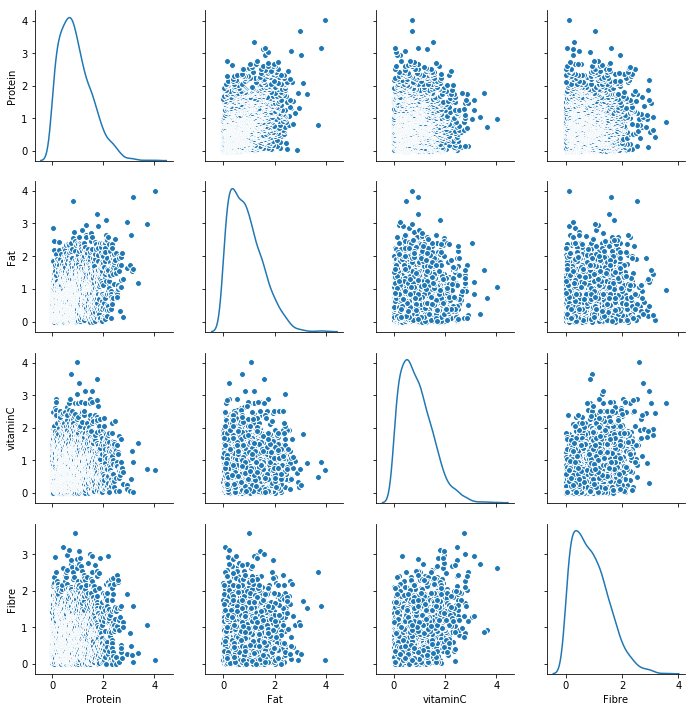

In [56]:
sns.pairplot(nutrient, diag_kind='kde') 

In [57]:
# We transform (centralize) the entire nutrient data to zscores through transformation. 
# We will create the PCA dimensions on this distribution. 

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
nutrient_std =  sc.fit_transform(nutrient)          
cov_matrix = np.cov(nutrient_std.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00057307  0.38253077  0.02540316  0.04384809]
 [ 0.38253077  1.00057307  0.04829969  0.06811834]
 [ 0.02540316  0.04829969  1.00057307  0.36167341]
 [ 0.04384809  0.06811834  0.36167341  1.00057307]]


In [58]:
#Compute the eigen vectors and values using linear algebra lambda decomposition

eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-0.5136229  -0.49012979 -0.70287794 -0.04389671]
 [-0.53984503 -0.45263957  0.70967078  0.00722082]
 [-0.45922822  0.54059078  0.00263582 -0.70488588]
 [-0.48359933  0.51249568 -0.04819792  0.70792431]]

 Eigen Values 
%s [ 1.46663112  1.2799764   0.61725689  0.63842786]


In [59]:
# From above Eigen Values, it is evident that 2 dimensions are optimal (Based on Kaiser Rule)

In [60]:
from sklearn.decomposition import PCA

pcamodel = PCA(n_components=2)
pcamodel.fit(nutrient)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [61]:
pcamodel.components_ 

# Each row represents a dimension and each column represents the original variables in order

array([[ 0.53456807,  0.57527859,  0.4221228 ,  0.45288394],
       [ 0.45026582,  0.42535978, -0.56405714, -0.54604879]])

In [63]:
df_comp = pd.DataFrame(pcamodel.components_,columns=nutrient.columns.values)

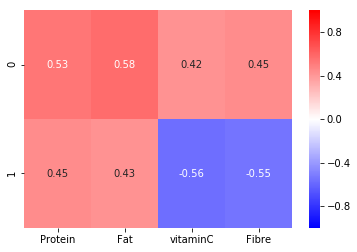

In [69]:
sns.heatmap(df_comp,cmap='bwr', annot=True,vmax=1,vmin=-1)

In [70]:
# Dimension 1 - Protein + Fat = Body Building
# Dimension 2 - vitaminC + Fibre = Weight Loss

In [73]:
# Extract the component scores

nutrient_dim = pcamodel.transform(nutrient)

In [81]:
bodybuilding = nutrient_dim[:,0]

In [80]:
weightloss = nutrient_dim[:,1]

In [82]:
x = {'bodybuild':bodybuilding,'weightloss':weightloss}

In [83]:
dim_nutrient = pd.DataFrame(x)

In [84]:
dim_nutrient

,bodybuild,weightloss
0,-1.274968,-0.304669
1,-0.490843,-1.004906
2,-1.537824,-0.028041
3,-0.601247,-1.242878
4,-0.777674,-0.478989
5,-0.369996,-0.995898
6,-0.701566,-0.713867
7,-1.105481,-0.298741
8,-0.686208,-0.485657
9,-1.283787,-0.359230


In [86]:
# Clustering dataset
# determine k using elbow method

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

In [87]:
# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(dim_nutrient)
    kmeanModel.fit(dim_nutrient)
    distortions.append(
        sum(np.min(cdist(dim_nutrient, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / dim_nutrient.shape[0])

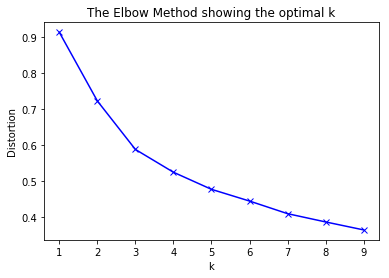

In [90]:
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [91]:
# Up until the 3rd cluster, the distorting movement is vertical and beyond that it becomes more horizontal

# Hence we could say, k = 3

In [92]:
kmeans = KMeans(n_clusters=3)

In [93]:
kmeans.fit(dim_nutrient)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [113]:
clusters = kmeans.labels_
clusters

array([0, 2, 0, ..., 1, 1, 1], dtype=int32)

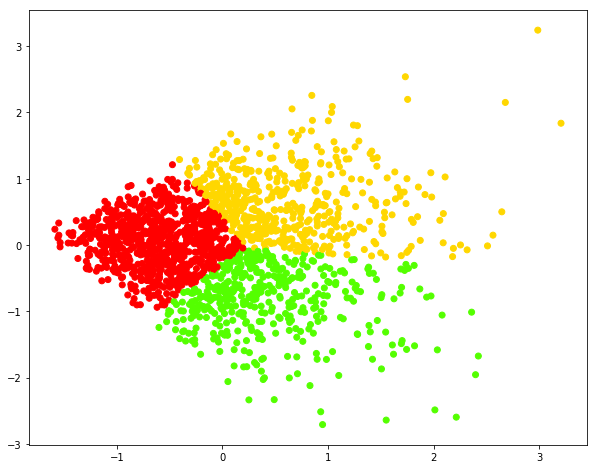

In [96]:
plt.figure(figsize=(10, 8))
plt.scatter(dim_nutrient['bodybuild'], dim_nutrient['weightloss'], c=clusters, cmap='prism')  # plot points with cluster dependent colors
plt.show()

In [125]:
x2 = {'bodybuild':bodybuilding,'weightloss':weightloss, 'xcluster':clusters, 'yproducts':prod}

In [126]:
clus_nutrient = pd.DataFrame(x2)

In [127]:
clus_nutrient.head()

,bodybuild,weightloss,xcluster,yproducts
0,-1.274968,-0.304669,0,Snacks
1,-0.490843,-1.004906,2,"Mountain yam, hawaii, cooked, steamed, without..."
2,-1.537824,-0.028041,0,Snacks
3,-0.601247,-1.242878,2,"Milk, chocolate, fluid, commercial, reduced fa..."
4,-0.777674,-0.478989,0,"Crackers, cheese, sandwich-type with cheese fi..."


In [135]:
arr_clus_nutrient = clus_nutrient.sort_values('xcluster')

In [136]:
arr_clus_nutrient.to_csv('nutrient_final_output.csv')